## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
%tensorflow_version 2.x
import numpy as np
from random import randint
import tensorflow as tf
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


###4. Find no.of samples in training and test dataset

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
 x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

###5. Find dimensions of an image in the dataset

In [7]:
x_train[1].shape

(28, 28)

In [8]:
y_train[0]

9

### 6. Verify if existing labels/Classes are correct 

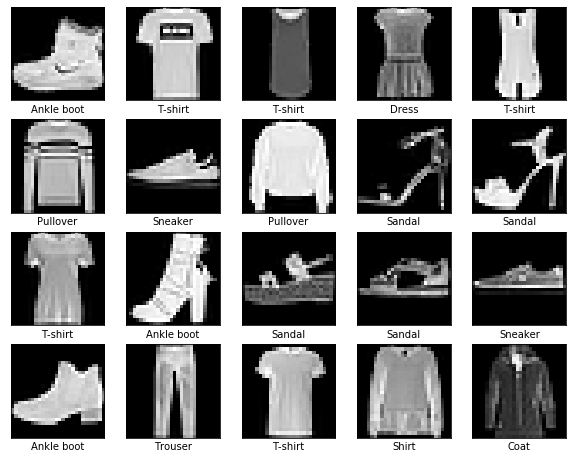

In [9]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rand_num = randint(10, 1000) # Taking some random numbers to see the picture and their labels
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train_enc = tf.convert_to_tensor(tf.keras.utils.to_categorical(y_train, num_classes=10))

In [0]:
y_test_enc = tf.convert_to_tensor(tf.keras.utils.to_categorical(y_test, num_classes=10))

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_norm = x_train / 255.0

In [0]:
x_test_norm = x_test / 255.0

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
x_train_reshaped = tf.keras.backend.expand_dims(x_train_norm)

In [0]:
x_test_reshaped = tf.keras.backend.expand_dims(x_test_norm)

###10. Import the necessary layers from keras to build the model

In [0]:
# Clear the session before building the model
tf.keras.backend.clear_session()

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
# Initialize model, reshape & normalize data
model1 = tf.keras.models.Sequential()

#Add first convolutional layer
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add second convolutional layer
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

In [0]:
#Flatten the output
model1.add(tf.keras.layers.Flatten())

#First Dense layer
model1.add(tf.keras.layers.Dense(128, activation='relu'))

#Second Dense layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#Fit the first model with the given dataset
model1.fit(x_train_reshaped, y_train_enc, validation_data=(x_test_reshaped, y_test_enc), epochs=10, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.3676 - accuracy: 0.8683 - val_loss: 0.2803 - val_accuracy: 0.8977
Epoch 2/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2288 - accuracy: 0.9147 - val_loss: 0.2755 - val_accuracy: 0.9031
Epoch 3/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.1678 - accuracy: 0.9375 - val_loss: 0.2401 - val_accuracy: 0.9177
Epoch 4/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1167 - accuracy: 0.9566 - val_loss: 0.2453 - val_accuracy: 0.9202
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0785 - accuracy: 0.9703 - val_loss: 0.2980 - val_accuracy: 0.9183
Epoch 6/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0526 - accuracy: 0.9807 - val_loss: 0.3405 - val_accuracy: 0.9144
Epoch 7/10
60000/60000 [=========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
# Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()

#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

In [0]:
#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Add another dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

In [0]:
#Flatten the output
model2.add(tf.keras.layers.Flatten())

#First Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))

#Second Dense layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
#Fit the second model with the given dataset
model2.fit(x_train_reshaped, y_train_enc, validation_data=(x_test_reshaped, y_test_enc), epochs=10, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3879 - accuracy: 0.8601 - val_loss: 0.3040 - val_accuracy: 0.8935
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2568 - accuracy: 0.9058 - val_loss: 0.2574 - val_accuracy: 0.9057
Epoch 3/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2095 - accuracy: 0.9230 - val_loss: 0.2265 - val_accuracy: 0.9194
Epoch 4/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1749 - accuracy: 0.9345 - val_loss: 0.2266 - val_accuracy: 0.9206
Epoch 5/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1488 - accuracy: 0.9437 - val_loss: 0.2285 - val_accuracy: 0.9195
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1265 - accuracy: 0.9518 - val_loss: 0.2431 - val_accuracy: 0.9242
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [27]:
model1.evaluate(x_test_reshaped, y_test_enc)

10000/10000 [==============================] - 1s 88us/sample - loss: 0.5027 - accuracy: 0.9152


[0.502664310169965, 0.9152]

In [28]:
model2.evaluate(x_test_reshaped, y_test_enc)

10000/10000 [==============================] - 1s 83us/sample - loss: 0.2683 - accuracy: 0.9220


[0.2683416126206517, 0.922]

####14. Verify performance of your model selectively 

In [0]:
predictions = model1.predict(x_train_reshaped)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]), color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

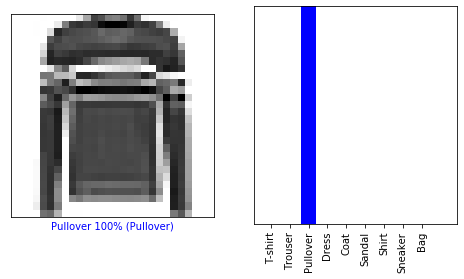

In [30]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# create image data augmentation generator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
datagen.fit(x_train_reshaped)

In [34]:
model2.fit_generator(datagen.flow(x_train_reshaped, y_train_enc, batch_size=32),
                    steps_per_epoch=len(x_train_reshaped) / 32, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1875.0 steps
Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 1.0443 - accuracy: 0.6501
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6467 - accuracy: 0.7599
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5790 - accuracy: 0.7861
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5400 - accuracy: 0.8006
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5064 - accuracy: 0.8123


####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

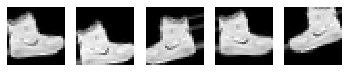

In [35]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshaped[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()